## This notebook assumes you have the following packages installed in your conda environment.

In [1]:
import pandas as pd
import json
import community
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import randomcolor

In [2]:
df_default = pd.read_csv('../generated-data/default-nd.csv')
df_default.shape


(144, 183)

In [3]:
df_sign = pd.read_csv('../data/signdata.csv')
df_sign.shape

(144, 182)

In [4]:
df_sign['SignBankEnglishTranslations'].value_counts()

clip, cut, scissors, snip, trim                                                        3
especially, except, special, unique                                                    3
cry out, shout, scream, yell                                                           3
canine, dog, puppy                                                                     3
insult, offend, offense                                                                2
                                                                                      ..
sad, sadness, sorrow, tragedy, tragic, unfortunate, unfortunately, unhappy             1
board, committee, council, employee, faculty, professor, staff, teachers, workforce    1
fill up, gas, gasoline, oil, petrol                                                    1
childhood, grow up, raise, upbringing                                                  1
archaeology, archeology, dig, mine                                                     1
Name: SignBankEnglish

In [5]:
df_default["Code"].values

array(['J_01_098', 'H_02_048', 'H_03_086', ..., 'E_03_042', 'B_02_056',
       'D_01_057'], dtype=object)

## Community Analysis

In [6]:
edges_df = pd.read_csv('scripts-data/run_1/default-neighbors.csv')
edges_df = edges_df.rename(columns={"neighbor": "source"})
edges_df.head()


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
2,A_01_002,F_02_088,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
3,A_01_002,H_03_004,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0
4,A_01_002,J_03_046,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN


In [7]:
edges_df.shape

(13250, 6)

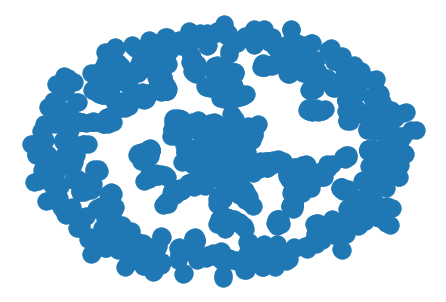

In [8]:
g = nx.from_pandas_edgelist(edges_df, source='source', target='target') 
nx.draw(g)

In [9]:
#first compute the best partition
from networkx.algorithms.community import greedy_modularity_communities
G = g

#Two methods for community analysis
c = greedy_modularity_communities(G)
partition = community.best_partition(G)

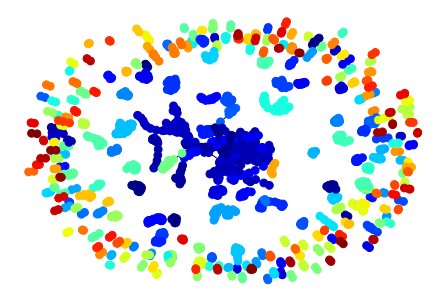

In [10]:
values = [partition.get(node) for node in G.nodes()]

nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=60, with_labels=False)

In [11]:
num_nodes = 0
for community in c:
    num_nodes += len(community)
print(num_nodes)

1920


In [12]:
len(partition)

1920

In [13]:
#Noes only connected by edges. Does not include standalone nodes.

list = partition.items()
print(len(list))
df_with_groupids = pd.DataFrame(list, columns=['Code', 'group_id'])
df_with_groupids.head()

1920


,Code,group_id
0,B_01_062,0
1,A_01_002,0
2,C_03_023,0
3,F_02_088,0
4,H_03_004,0


In [14]:
# get edges only where source and target nodes belong to a valid community for now. This is to assign them group ids.
nodes_in_communities = df_with_groupids['Code'].unique()
edges_for_community_nodes_df = edges_df.loc[edges_df['source'].isin(nodes_in_communities) & edges_df['target'].isin(nodes_in_communities)]
print(len(edges_for_community_nodes_df['source'].unique()))
print(edges_df.shape)
print(edges_for_community_nodes_df.shape)
edges_for_community_nodes_df.head()

1920
(13250, 6)
(13250, 6)


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
2,A_01_002,F_02_088,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
3,A_01_002,H_03_004,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0
4,A_01_002,J_03_046,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN


In [15]:

df_merged = pd.merge(df_default, df_with_groupids,how='left', on=['Code'])
print(df_merged.shape)
# print(df_merged.columns.values)
df_merged.head()

(2728, 172)


,EntryID,LemmaID,Code,YouTube Video,SignFrequency(M),SignFrequency(SD),SignFrequency(Z),SignFrequency(N),PercentUnknown,SignFrequency(M-Native),...,H index,SignBankID,Parameter.Neighborhood.Density.2.0,Neighborhood Density 2.0,Parameter.Neighborhood.Density.2.0.1,Neighborhood Density 2.0.1,DominantTranslation,SignBankID.1,Neighborhood Density,group_id
0,arms-cross,arms-cross,J_01_098,NaN,3.467,2.177,-0.458,30,0,3.400,...,NaN,arms-cross\t,0,3,0,3,NaN,arms-cross\t,0,NaN
1,raise-hand,raise-hand,H_02_048,NaN,5.154,1.891,0.544,28,0,5.500,...,NaN,raise-hand\t,0,3,0,3,NaN,raise-hand\t,0,NaN
2,sigh,sigh,H_03_086,NaN,3.931,1.751,-0.196,30,0,3.267,...,NaN,sigh\t,0,3,0,3,NaN,sigh\t,0,NaN
3,1_dollar,1_dollar,C_02_025,NaN,3.034,1.500,-0.775,29,0,2.944,...,NaN,DOLLAR,9,0,9,0,NaN,DOLLAR,0,NaN
4,5_dollars,5_dollars,B_01_062,NaN,5.120,1.716,0.302,25,0,5.214,...,-0.2,FIVE-DOLLARS,8,4,8,4,NaN,FIVE-DOLLARS,5,0.0


In [40]:
values = {'group_id': 1000}
df_merged = df_merged.fillna(value=values)

print(df_merged['group_id'])
unique_community_ids = df_merged['group_id'].unique()
unique_community_ids

0       500.0
1       500.0
2       500.0
3       500.0
4         0.0
        ...  
2723     17.0
2724    500.0
2725      9.0
2726    500.0
2727    500.0
Name: group_id, Length: 2728, dtype: float64


array([500.,   0., 130., 168., 117., 240., 128.,  52., 198., 125., 166.,
        41.,  87., 167.,  60.,   2.,  12., 176., 254., 103.,  86., 127.,
        10.,   4.,   9.,  64., 177.,  17.,  77., 196.,  55., 146., 139.,
        97.,  89., 101.,  92.,  13.,  24., 179., 141.,  81., 154.,  59.,
        38., 170.,  29.,  21.,   1.,  45.,  51., 192., 100., 152.,  82.,
       121., 195., 231.,  94.,  33., 249., 109., 120.,  69., 115., 214.,
       215., 187., 257.,  36., 147.,  88.,  27., 272.,  44.,  99., 248.,
       197.,  95.,  16., 238.,  49., 155., 144.,  65., 227.,  22., 164.,
       213.,  28.,  85.,  66., 110., 131.,  68.,  32.,  56.,  18.,   5.,
       270.,  11.,  90.,  19.,  15., 126.,  72., 162.,   8., 134.,  23.,
         3., 222.,  40., 178., 216., 209.,  47., 206., 150., 190.,  20.,
       123., 265., 207.,  37., 188., 174.,  70., 156., 118., 182., 236.,
       212., 211., 113., 258., 124.,  42., 266.,  71.,   7., 151., 132.,
        43., 246.,  46., 253.,  79.,  30., 230.,  5

In [41]:

#Will assign all NaN's same color for now. That's okay.


import random
 
def colors(n):
    if(n == 0):
        n = 600
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    
    step = 256 / n
#     print(n,r,g,b,step)

    r += step
    g += step
    b += step
    r = int(r) % 256
    g = int(g) % 256
    b = int(b) % 256
    
    colorstr = str(r)+","+str(b)+"," + str(g)
    return '#%02x%02x%02x' % (r, g, b)

color_dict = []
color_dictionary = {}
for groupid in unique_community_ids:
    #generate a random color
    color = colors(groupid)
    if(groupid == 1000):        
        color_dict.append({'group_id': 1000, 'color_code': color})
        color_dictionary['island'] = color
    else:        
        color_dict.append({'group_id':groupid , 'color_code': color})
        color_dictionary[str(int(groupid))] = color
    
color_dict

[{'group_id': 500, 'color_code': '#36df70'},
 {'group_id': 0.0, 'color_code': '#b10733'},
 {'group_id': 130.0, 'color_code': '#6a7d7d'},
 {'group_id': 168.0, 'color_code': '#444376'},
 {'group_id': 117.0, 'color_code': '#a7be4a'},
 {'group_id': 240.0, 'color_code': '#02d77b'},
 {'group_id': 128.0, 'color_code': '#d328f4'},
 {'group_id': 52.0, 'color_code': '#bdb944'},
 {'group_id': 198.0, 'color_code': '#918bb2'},
 {'group_id': 125.0, 'color_code': '#6fd59a'},
 {'group_id': 166.0, 'color_code': '#75d5f8'},
 {'group_id': 41.0, 'color_code': '#7145ac'},
 {'group_id': 87.0, 'color_code': '#787d21'},
 {'group_id': 167.0, 'color_code': '#e538e6'},
 {'group_id': 60.0, 'color_code': '#05cb4e'},
 {'group_id': 2.0, 'color_code': '#77445f'},
 {'group_id': 12.0, 'color_code': '#a8523b'},
 {'group_id': 176.0, 'color_code': '#0ec0ff'},
 {'group_id': 254.0, 'color_code': '#c201eb'},
 {'group_id': 103.0, 'color_code': '#f765c3'},
 {'group_id': 86.0, 'color_code': '#ccb2d1'},
 {'group_id': 127.0, 'col

In [18]:
from IPython.display import Markdown
for color in color_dict:
    display (Markdown('<br><span style="color:' +color['color_code']+ '">Sample</span>.'))
    


<br><span style="color:#0f0ba9">Sample</span>.

<br><span style="color:#8f3659">Sample</span>.

<br><span style="color:#972028">Sample</span>.

<br><span style="color:#0c239e">Sample</span>.

<br><span style="color:#5597fd">Sample</span>.

<br><span style="color:#ec28d6">Sample</span>.

<br><span style="color:#962e0f">Sample</span>.

<br><span style="color:#c082e0">Sample</span>.

<br><span style="color:#994453">Sample</span>.

<br><span style="color:#bd2594">Sample</span>.

<br><span style="color:#a417ca">Sample</span>.

<br><span style="color:#96b010">Sample</span>.

<br><span style="color:#193790">Sample</span>.

<br><span style="color:#d50f00">Sample</span>.

<br><span style="color:#104eb4">Sample</span>.

<br><span style="color:#7bae5f">Sample</span>.

<br><span style="color:#cf0df7">Sample</span>.

<br><span style="color:#c0d95f">Sample</span>.

<br><span style="color:#989cea">Sample</span>.

<br><span style="color:#36948a">Sample</span>.

<br><span style="color:#611a6d">Sample</span>.

<br><span style="color:#9d90ea">Sample</span>.

<br><span style="color:#fc4a02">Sample</span>.

<br><span style="color:#aa224e">Sample</span>.

<br><span style="color:#033d06">Sample</span>.

<br><span style="color:#98d2e6">Sample</span>.

<br><span style="color:#ea8427">Sample</span>.

<br><span style="color:#7dbba7">Sample</span>.

<br><span style="color:#2f56f6">Sample</span>.

<br><span style="color:#3c5485">Sample</span>.

<br><span style="color:#1e8567">Sample</span>.

<br><span style="color:#74a2fd">Sample</span>.

<br><span style="color:#e4c1ee">Sample</span>.

<br><span style="color:#d663dc">Sample</span>.

<br><span style="color:#a5e1b9">Sample</span>.

<br><span style="color:#a8b32d">Sample</span>.

<br><span style="color:#d0f143">Sample</span>.

<br><span style="color:#6056b1">Sample</span>.

<br><span style="color:#8db2c2">Sample</span>.

<br><span style="color:#8f1237">Sample</span>.

<br><span style="color:#bd0b4b">Sample</span>.

<br><span style="color:#f0dab0">Sample</span>.

<br><span style="color:#62bda9">Sample</span>.

<br><span style="color:#ee71bb">Sample</span>.

<br><span style="color:#983626">Sample</span>.

<br><span style="color:#07b64f">Sample</span>.

<br><span style="color:#0e065d">Sample</span>.

<br><span style="color:#48030d">Sample</span>.

<br><span style="color:#dc99b6">Sample</span>.

<br><span style="color:#96a8b5">Sample</span>.

<br><span style="color:#770dc9">Sample</span>.

<br><span style="color:#3f05f6">Sample</span>.

<br><span style="color:#4a4e00">Sample</span>.

<br><span style="color:#018ccc">Sample</span>.

<br><span style="color:#90bc3d">Sample</span>.

<br><span style="color:#8a1118">Sample</span>.

<br><span style="color:#eddd4e">Sample</span>.

<br><span style="color:#767888">Sample</span>.

<br><span style="color:#fbf4ce">Sample</span>.

<br><span style="color:#495f27">Sample</span>.

<br><span style="color:#ba6753">Sample</span>.

<br><span style="color:#36f2b8">Sample</span>.

<br><span style="color:#895aaf">Sample</span>.

<br><span style="color:#fdcaf6">Sample</span>.

<br><span style="color:#ad0e68">Sample</span>.

<br><span style="color:#05020f">Sample</span>.

<br><span style="color:#2958ba">Sample</span>.

<br><span style="color:#a71b6a">Sample</span>.

<br><span style="color:#a30a63">Sample</span>.

<br><span style="color:#16e57e">Sample</span>.

<br><span style="color:#078410">Sample</span>.

<br><span style="color:#ae22ac">Sample</span>.

<br><span style="color:#8c8fc3">Sample</span>.

<br><span style="color:#20b938">Sample</span>.

<br><span style="color:#7eec67">Sample</span>.

<br><span style="color:#8fabb6">Sample</span>.

<br><span style="color:#631198">Sample</span>.

<br><span style="color:#150c27">Sample</span>.

<br><span style="color:#1aeb52">Sample</span>.

<br><span style="color:#7ca90a">Sample</span>.

<br><span style="color:#fa4ce9">Sample</span>.

<br><span style="color:#04927e">Sample</span>.

<br><span style="color:#7e7bcc">Sample</span>.

<br><span style="color:#c7052e">Sample</span>.

<br><span style="color:#45ba8c">Sample</span>.

<br><span style="color:#c5bab4">Sample</span>.

<br><span style="color:#6df95c">Sample</span>.

<br><span style="color:#06f8d8">Sample</span>.

<br><span style="color:#cabb5a">Sample</span>.

<br><span style="color:#db8c75">Sample</span>.

<br><span style="color:#b28e9f">Sample</span>.

<br><span style="color:#db86e9">Sample</span>.

<br><span style="color:#934992">Sample</span>.

<br><span style="color:#0620a7">Sample</span>.

<br><span style="color:#e72f3b">Sample</span>.

<br><span style="color:#3dcc89">Sample</span>.

<br><span style="color:#2a586d">Sample</span>.

<br><span style="color:#331cfe">Sample</span>.

<br><span style="color:#209384">Sample</span>.

<br><span style="color:#19cb84">Sample</span>.

<br><span style="color:#ea5a74">Sample</span>.

<br><span style="color:#167fc7">Sample</span>.

<br><span style="color:#66abeb">Sample</span>.

<br><span style="color:#be2cf0">Sample</span>.

<br><span style="color:#86b3f0">Sample</span>.

<br><span style="color:#5cd1fe">Sample</span>.

<br><span style="color:#1458c2">Sample</span>.

<br><span style="color:#9bbb38">Sample</span>.

<br><span style="color:#8e5252">Sample</span>.

<br><span style="color:#4f0dad">Sample</span>.

<br><span style="color:#60617b">Sample</span>.

<br><span style="color:#2c06cd">Sample</span>.

<br><span style="color:#4d0f17">Sample</span>.

<br><span style="color:#81be86">Sample</span>.

<br><span style="color:#2c42be">Sample</span>.

<br><span style="color:#631351">Sample</span>.

<br><span style="color:#59f551">Sample</span>.

<br><span style="color:#0634a8">Sample</span>.

<br><span style="color:#d8b87e">Sample</span>.

<br><span style="color:#5e1755">Sample</span>.

<br><span style="color:#723d11">Sample</span>.

<br><span style="color:#da5773">Sample</span>.

<br><span style="color:#2a4a34">Sample</span>.

<br><span style="color:#64ed83">Sample</span>.

<br><span style="color:#d23fa1">Sample</span>.

<br><span style="color:#c1e950">Sample</span>.

<br><span style="color:#90cefd">Sample</span>.

<br><span style="color:#a60aca">Sample</span>.

<br><span style="color:#775831">Sample</span>.

<br><span style="color:#92f089">Sample</span>.

<br><span style="color:#eaedc3">Sample</span>.

<br><span style="color:#2d9de5">Sample</span>.

<br><span style="color:#96a351">Sample</span>.

<br><span style="color:#cb3542">Sample</span>.

<br><span style="color:#1a7d11">Sample</span>.

<br><span style="color:#ab0b2f">Sample</span>.

<br><span style="color:#8cd54f">Sample</span>.

<br><span style="color:#934084">Sample</span>.

<br><span style="color:#fcda6e">Sample</span>.

<br><span style="color:#babdcb">Sample</span>.

<br><span style="color:#b952b1">Sample</span>.

<br><span style="color:#27bc4d">Sample</span>.

<br><span style="color:#602414">Sample</span>.

<br><span style="color:#70e84b">Sample</span>.

<br><span style="color:#c8b2d1">Sample</span>.

<br><span style="color:#a24732">Sample</span>.

<br><span style="color:#7df139">Sample</span>.

<br><span style="color:#86b9a5">Sample</span>.

<br><span style="color:#734eb1">Sample</span>.

<br><span style="color:#0fe3f3">Sample</span>.

<br><span style="color:#da2c4f">Sample</span>.

<br><span style="color:#d07871">Sample</span>.

<br><span style="color:#d99e64">Sample</span>.

<br><span style="color:#c28da5">Sample</span>.

<br><span style="color:#4fe1ab">Sample</span>.

<br><span style="color:#a9fbd0">Sample</span>.

<br><span style="color:#900867">Sample</span>.

<br><span style="color:#6bd837">Sample</span>.

<br><span style="color:#2bc0c9">Sample</span>.

<br><span style="color:#a67d4c">Sample</span>.

<br><span style="color:#0ed8af">Sample</span>.

<br><span style="color:#23bd18">Sample</span>.

<br><span style="color:#9c42c1">Sample</span>.

<br><span style="color:#e4b0ec">Sample</span>.

<br><span style="color:#3a5088">Sample</span>.

<br><span style="color:#9d325e">Sample</span>.

<br><span style="color:#d5d407">Sample</span>.

<br><span style="color:#680f63">Sample</span>.

<br><span style="color:#1f8917">Sample</span>.

<br><span style="color:#ca2a92">Sample</span>.

<br><span style="color:#f5e799">Sample</span>.

<br><span style="color:#8b628f">Sample</span>.

<br><span style="color:#6f2478">Sample</span>.

<br><span style="color:#d4dcb2">Sample</span>.

<br><span style="color:#4db82f">Sample</span>.

<br><span style="color:#c5ceef">Sample</span>.

<br><span style="color:#fa646b">Sample</span>.

<br><span style="color:#7cbbf6">Sample</span>.

<br><span style="color:#801b83">Sample</span>.

<br><span style="color:#1091e3">Sample</span>.

<br><span style="color:#7db819">Sample</span>.

<br><span style="color:#6c1e4b">Sample</span>.

<br><span style="color:#47521c">Sample</span>.

<br><span style="color:#e53e82">Sample</span>.

<br><span style="color:#e6ec9f">Sample</span>.

<br><span style="color:#9c7a8a">Sample</span>.

<br><span style="color:#dd5c85">Sample</span>.

<br><span style="color:#58170c">Sample</span>.

<br><span style="color:#108a56">Sample</span>.

<br><span style="color:#0489d0">Sample</span>.

<br><span style="color:#dd878b">Sample</span>.

<br><span style="color:#a0d594">Sample</span>.

<br><span style="color:#c6571d">Sample</span>.

<br><span style="color:#ce09f4">Sample</span>.

<br><span style="color:#115489">Sample</span>.

<br><span style="color:#b675f5">Sample</span>.

<br><span style="color:#cde7ba">Sample</span>.

<br><span style="color:#8e7c4f">Sample</span>.

<br><span style="color:#b5fc56">Sample</span>.

<br><span style="color:#5e43e5">Sample</span>.

<br><span style="color:#605259">Sample</span>.

<br><span style="color:#b9b73e">Sample</span>.

<br><span style="color:#659e2e">Sample</span>.

<br><span style="color:#7ab30a">Sample</span>.

<br><span style="color:#6a35d1">Sample</span>.

<br><span style="color:#18a402">Sample</span>.

<br><span style="color:#39be39">Sample</span>.

<br><span style="color:#2e6512">Sample</span>.

<br><span style="color:#c60031">Sample</span>.

<br><span style="color:#db6f9f">Sample</span>.

<br><span style="color:#93513b">Sample</span>.

<br><span style="color:#09966a">Sample</span>.

<br><span style="color:#135d18">Sample</span>.

<br><span style="color:#a80392">Sample</span>.

<br><span style="color:#637cb0">Sample</span>.

<br><span style="color:#96f4d0">Sample</span>.

<br><span style="color:#6bcb10">Sample</span>.

<br><span style="color:#269d18">Sample</span>.

<br><span style="color:#86f186">Sample</span>.

<br><span style="color:#831bb1">Sample</span>.

<br><span style="color:#476ab4">Sample</span>.

<br><span style="color:#0deee1">Sample</span>.

<br><span style="color:#786410">Sample</span>.

<br><span style="color:#3d603c">Sample</span>.

<br><span style="color:#5fcf3f">Sample</span>.

<br><span style="color:#816bf4">Sample</span>.

<br><span style="color:#0e6422">Sample</span>.

<br><span style="color:#052aa1">Sample</span>.

<br><span style="color:#a4a3c5">Sample</span>.

<br><span style="color:#d51c8a">Sample</span>.

<br><span style="color:#b12448">Sample</span>.

<br><span style="color:#b54683">Sample</span>.

<br><span style="color:#27fc82">Sample</span>.

<br><span style="color:#69ae11">Sample</span>.

<br><span style="color:#e4b561">Sample</span>.

<br><span style="color:#c0ebc5">Sample</span>.

<br><span style="color:#a64d5b">Sample</span>.

<br><span style="color:#55a088">Sample</span>.

<br><span style="color:#61854d">Sample</span>.

<br><span style="color:#3793d5">Sample</span>.

<br><span style="color:#e48cd9">Sample</span>.

<br><span style="color:#bf5d94">Sample</span>.

<br><span style="color:#e8a388">Sample</span>.

<br><span style="color:#d01406">Sample</span>.

<br><span style="color:#e06d25">Sample</span>.

<br><span style="color:#6cfd3b">Sample</span>.

<br><span style="color:#824220">Sample</span>.

<br><span style="color:#17f7ab">Sample</span>.

<br><span style="color:#695f66">Sample</span>.

<br><span style="color:#c3ded3">Sample</span>.

<br><span style="color:#e92ef4">Sample</span>.

<br><span style="color:#f8d981">Sample</span>.

<br><span style="color:#a94bcd">Sample</span>.

<br><span style="color:#41e2a1">Sample</span>.

<br><span style="color:#ef368b">Sample</span>.

<br><span style="color:#1eedd1">Sample</span>.

<br><span style="color:#01a2a3">Sample</span>.

<br><span style="color:#a139e1">Sample</span>.

<br><span style="color:#a2bb0d">Sample</span>.

<br><span style="color:#551763">Sample</span>.

<br><span style="color:#be9d3e">Sample</span>.

<br><span style="color:#5783db">Sample</span>.

<br><span style="color:#094ace">Sample</span>.

<br><span style="color:#0b9aeb">Sample</span>.

<br><span style="color:#b35d13">Sample</span>.

<br><span style="color:#38286e">Sample</span>.

<br><span style="color:#4fcc58">Sample</span>.

<br><span style="color:#ef11dd">Sample</span>.

<br><span style="color:#def6ab">Sample</span>.

<br><span style="color:#954ae7">Sample</span>.

<br><span style="color:#e169d0">Sample</span>.

<br><span style="color:#4b2313">Sample</span>.

<br><span style="color:#ed70bc">Sample</span>.

<br><span style="color:#25ccb9">Sample</span>.

In [44]:
color_df = pd.DataFrame(color_dict)
df_merged_with_color = pd.merge(df_merged, color_df,how='left', on=['group_id'])
print(df_merged_with_color.shape)
df_merged_with_color.head()


(2728, 173)


,EntryID,LemmaID,Code,YouTube Video,SignFrequency(M),SignFrequency(SD),SignFrequency(Z),SignFrequency(N),PercentUnknown,SignFrequency(M-Native),...,SignBankID,Parameter.Neighborhood.Density.2.0,Neighborhood Density 2.0,Parameter.Neighborhood.Density.2.0.1,Neighborhood Density 2.0.1,DominantTranslation,SignBankID.1,Neighborhood Density,group_id,color_code
0,arms-cross,arms-cross,J_01_098,NaN,3.467,2.177,-0.458,30,0,3.400,...,arms-cross\t,0,3,0,3,NaN,arms-cross\t,0,500.0,#36df70
1,raise-hand,raise-hand,H_02_048,NaN,5.154,1.891,0.544,28,0,5.500,...,raise-hand\t,0,3,0,3,NaN,raise-hand\t,0,500.0,#36df70
2,sigh,sigh,H_03_086,NaN,3.931,1.751,-0.196,30,0,3.267,...,sigh\t,0,3,0,3,NaN,sigh\t,0,500.0,#36df70
3,1_dollar,1_dollar,C_02_025,NaN,3.034,1.500,-0.775,29,0,2.944,...,DOLLAR,9,0,9,0,NaN,DOLLAR,0,500.0,#36df70
4,5_dollars,5_dollars,B_01_062,NaN,5.120,1.716,0.302,25,0,5.214,...,FIVE-DOLLARS,8,4,8,4,NaN,FIVE-DOLLARS,5,0.0,#b10733


In [45]:
df_merged_with_color.shape

(2728, 173)

In [46]:
#Need only 5 columns for now
df_node_graph_json_data = df_merged_with_color[["EntryID", "Code", "group_id", "color_code", "SignFrequency(Z)"]]
print(df_node_graph_json_data.shape)
df_node_graph_json_data.head(20)


(2728, 5)


,EntryID,Code,group_id,color_code,SignFrequency(Z)
0,arms-cross,J_01_098,500.0,#36df70,-0.458
1,raise-hand,H_02_048,500.0,#36df70,0.544
2,sigh,H_03_086,500.0,#36df70,-0.196
3,1_dollar,C_02_025,500.0,#36df70,-0.775
4,5_dollars,B_01_062,0.0,#b10733,0.302
5,8_hour,C_02_055,500.0,#36df70,-0.043
6,9_oclock,C_02_080,130.0,#6a7d7d,-0.126
7,a-line_bob,K_03_127,168.0,#444376,-0.198
8,a_little_bit,H_03_025,117.0,#a7be4a,-0.762
9,abbreviate,G_01_040,240.0,#02d77b,0.669


In [47]:
edges_df.head()

,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
2,A_01_002,F_02_088,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
3,A_01_002,H_03_004,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0
4,A_01_002,J_03_046,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN


In [48]:
not_need_edge_cols = ['num_matched_features', 'matched_features', 'num_missed_features', 'missed_features']
links_df = edges_df.drop(columns=not_need_edge_cols)
links_df.head()

,target,source
0,A_01_002,B_01_062
1,A_01_002,C_03_023
2,A_01_002,F_02_088
3,A_01_002,H_03_004
4,A_01_002,J_03_046


In [49]:
edges_json_str = links_df.to_json(orient="records")
edges_json = json.loads(edges_json_str)
edges_json[0]

{'target': 'A_01_002', 'source': 'B_01_062'}

In [50]:
#### Get rid of morpheme columbs
print(len(df_default.columns.values))
df_sign = df_sign[['YouTube Video','Code','SignBankEnglishTranslations']]
df_sign = df_sign.rename(columns={"YouTube Video": "video"}, errors="raise")
df_sign.head()
df_default = pd.merge(df_default, df_sign,how='left', on=['Code'])

test_df = df_default
filtered = test_df.filter(regex='M..2.0|Video')
no_morphemes_df = test_df[test_df.columns.drop(filtered.columns.values)]
len(no_morphemes_df.columns.values)


171


87

In [51]:
### Add sign constraint range values
numerical_attr = no_morphemes_df.select_dtypes(include=['float', 'int']).columns.values
categorical_attr = []
for column in no_morphemes_df.columns.values:
    if column not in numerical_attr:
        categorical_attr.append(column)   
# print(numerical_attr)
# print(categorical_attr)

In [52]:
import math 
import pprint

constraints = {}
for attr in categorical_attr:
    if attr not in ['EntryID', 'LemmaID', 'Code', 'Iconicity_ID']:
        columnsData = no_morphemes_df.loc[ : , attr ].dropna()
        values_set = set(columnsData.values)
        constraints[attr] = [*values_set, ]
        
for attr in numerical_attr:    
    #drop nan values 
    columnsData = no_morphemes_df.loc[ : , attr ].dropna()
    constraints[attr] = {}  
    #print(math.floor(min(list(columnsData))), math.ceil(max(list(columnsData))), attr)
    constraints[attr]['min'] = math.floor(min(columnsData.values))
    constraints[attr]['max'] = math.ceil(max(columnsData.values))

pprint.pprint(constraints)

{'ClipLength(ms)': {'max': 3737, 'min': 701},
 'Compound.2.0': {'max': 1, 'min': 0},
 'Contact.2.0': {'max': 1, 'min': 0},
 'Contact.2.0Frequency': {'max': 1694, 'min': 1030},
 'D.Iconicity(M) all': {'max': 7, 'min': 1},
 'D.Iconicity(M) native': {'max': 7, 'min': 1},
 'D.Iconicity(N) all': {'max': 31, 'min': 26},
 'D.Iconicity(N) native': {'max': 22, 'min': 18},
 'D.Iconicity(SD) all': {'max': 3, 'min': 0},
 'D.Iconicity(SD) native': {'max': 3, 'min': 0},
 'D.Iconicity(Z) all': {'max': 3, 'min': -2},
 'D.Iconicity(Z) native': {'max': 3, 'min': -2},
 'DominantTranslation': ['corn_2',
                         'wring',
                         'boots',
                         'think_over',
                         'see_see',
                         'emotion',
                         'sunbathe_2',
                         'wash_face',
                         'short',
                         'pile',
                         'pipe',
                         'ceiling',
                 

                                 'clinic, hospital, hospital head',
                                 'haunted, horror, monster, scary',
                                 'autumn, fall, season',
                                 'destination, to, until, up to',
                                 'bald, bare, bareheaded',
                                 'BING, bing, habit, likely, tendency, tend '
                                 'to, typical, typically',
                                 'stand, stand up, upright',
                                 'experience',
                                 'America, United States, US, USA',
                                 'drag, draw, draw out, elicit, elicitation, '
                                 'get, get out, haul, jerk, lug, pull, pull '
                                 'out, recruit, tow, tug, yank',
                                 'assess, evaluate, evaluation, experiment',
                                 'again and again, frequent, often, re

                  'ART',
                  'TENNIS',
                  'INDEPENDENT',
                  'PEABRAIN',
                  'TOOTHBRUSH',
                  'LONG-AGOneut\t',
                  'SKIP',
                  'LIPSTICK',
                  'DAY',
                  'NINE',
                  'CITYtap\t',
                  'COOLf',
                  'REMIND',
                  'CRY',
                  'MICROWAVE',
                  'ALCOHOL',
                  'EIGHT',
                  'VOMIT',
                  'FORBID',
                  'SINGLE-OUT\t',
                  'DISAPPEAR',
                  'SCREWDRIVER',
                  'INHALE',
                  'PARACHUTE',
                  'MINUTEb',
                  'OPEN-WINDOW\t',
                  'HEAVY',
                  'PLAYER',
                  'BANANAfull',
                  'OLD',
                  'CONFUSEDix',
                  'WATERDROP',
                  'USED-TO\t',
                  'VIDEO-GAME

           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/pinkMKABMbk?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/x-SLyjzqpWA?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/TN00OxGVbMU?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/ydK2ekHik3I?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/Wl9tIeWa8sg?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></ifram

           'src="https://www.youtube.com/embed/rzqvnoCaPVc?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/Yfz8bK3vaDo?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/3P6fBTYUeaM?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/7ld4-Gh4fIM?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/_1J7GFrcI3A?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="15

           'src="https://www.youtube.com/embed/I-8-4TvfOnk?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/31H5F5h1E1E?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/HwFgqLFtDGQ?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/3coJw969e1Y?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/CO3p9Q01kr0?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="15

In [53]:
nodes_json_str = df_node_graph_json_data.to_json(orient="records")
nodes_json = json.loads(nodes_json_str)
nodes_json[0]


{'EntryID': 'arms-cross',
 'Code': 'J_01_098',
 'group_id': 500.0,
 'color_code': '#36df70',
 'SignFrequency(Z)': -0.458}

In [54]:
no_morphemes_df[no_morphemes_df['Code'].isin(df_default["Code"].values)]


,EntryID,LemmaID,Code,SignFrequency(M),SignFrequency(SD),SignFrequency(Z),SignFrequency(N),PercentUnknown,SignFrequency(M-Native),SignFrequency(SD-Native),...,SignBankID,Parameter.Neighborhood.Density.2.0,Neighborhood Density 2.0,Parameter.Neighborhood.Density.2.0.1,Neighborhood Density 2.0.1,DominantTranslation,SignBankID.1,Neighborhood Density,video,SignBankEnglishTranslations
0,arms-cross,arms-cross,J_01_098,3.467,2.177,-0.458,30,0,3.400,2.293,...,arms-cross\t,0,3,0,3,NaN,arms-cross\t,0,"<iframe width=""280"" height=""158"" src=""https://...","action, arms crossed, stern look, what, what h..."
1,raise-hand,raise-hand,H_02_048,5.154,1.891,0.544,28,0,5.500,1.446,...,raise-hand\t,0,3,0,3,NaN,raise-hand\t,0,"<iframe width=""280"" height=""158"" src=""https://...","action, I have a question, me, raise hand, vol..."
2,sigh,sigh,H_03_086,3.931,1.751,-0.196,30,0,3.267,1.624,...,sigh\t,0,3,0,3,NaN,sigh\t,0,"<iframe width=""280"" height=""158"" src=""https://...","action, exasperated, I didn't mean that, I giv..."
3,1_dollar,1_dollar,C_02_025,3.034,1.500,-0.775,29,0,2.944,1.474,...,DOLLAR,9,0,9,0,NaN,DOLLAR,0,"<iframe width=""280"" height=""158"" src=""https://...","bill, cash, dollar, money"
4,5_dollars,5_dollars,B_01_062,5.120,1.716,0.302,25,0,5.214,1.847,...,FIVE-DOLLARS,8,4,8,4,NaN,FIVE-DOLLARS,5,"<iframe width=""280"" height=""158"" src=""https://...","dollar, five dollars, money"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,zero,zero,D_03_036,4.192,1.415,0.051,26,0,4.313,1.138,...,ZERO,19,5,19,5,NaN,ZERO,6,"<iframe width=""280"" height=""158"" src=""https://...","0, none, number, zero, zilch"
2724,zipper,zipper,D_01_034,3.148,1.610,-0.556,27,0,2.875,1.310,...,ZIPPER,0,0,0,0,NaN,ZIPPER,0,"<iframe width=""280"" height=""158"" src=""https://...","coat, jacket, zipper"
2725,zoo,zoo,E_03_042,3.533,1.776,-0.346,30,0,3.857,1.916,...,NaN,4,3,4,3,NaN,NaN,3,"<iframe width=""280"" height=""158"" src=""https://...",NaN
2726,zoom_in,zoom_in,B_02_056,3.958,1.781,-0.443,24,0,3.929,1.492,...,ZOOM-IN\t,38,0,38,0,zoom_in,ZOOM-IN\t,0,"<iframe width=""280"" height=""158"" src=""https://...","computer screen, enlarge, expand, make bigger,..."


In [55]:
# write all the data frames to respective json files

graph = {
    "nodes" : nodes_json,
    "links": edges_json
}

with open("../generated-data/graph.json", 'w') as file:
    json.dump(graph, file)
    
    
with open('../generated-data/constraints.json', 'w') as fp:
    json.dump(constraints, fp)
    
no_morphemes_df.reset_index().to_json('../generated-data/sign_props.json', orient='records')


In [ ]:
#drawing only nodes with edges
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(30)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = randomcolor.RandomColor().generate()[0])


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [ ]:
## Code to change color in json
color_dictionary


In [ ]:
###Only if you need to edit the graph json files

def filter_dict(d, filter_string):
#     print(filter_string)
    for key, val in d.items():
        if filter_string != key:
            continue
        return key, val

with open('../../visualization/data/graph.json') as graph_json_file:
    data = json.load(graph_json_file)
    for node in data['nodes']:
        if(node['group_id'] == ""):
            node['group_id']= "island"    
#             print(node)
    
    for node in data['nodes']:
        key,val = filter_dict(color_dictionary, str(node['group_id']))
        node['color_code'] = val
        print(node)


In [ ]:
#Resave as JSON

graph = {
    "nodes" : data['nodes'],
    "links": data['links']
}

with open("../generated-data/graph.json", 'w') as file:
    json.dump(graph, file)